# Análisis Completo de Datos Retail

Este notebook incluye:
1. EDA con análisis de nulos y duplicados
2. Preprocesamiento de datos
3. Benchmarking de modelos ML
4. Análisis de métricas

In [2]:
# Instalación de librerías necesarias para Google Colab
!pip install xgboost lightgbm -q

# Importar todas las librerías necesarias
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.impute import SimpleImputer
from sklearn.preprocessing import StandardScaler, OneHotEncoder
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline
from sklearn.model_selection import train_test_split, cross_val_score
from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from xgboost import XGBClassifier
from lightgbm import LGBMClassifier
from sklearn.metrics import (
    accuracy_score, precision_score, recall_score, f1_score,
    roc_auc_score, classification_report, confusion_matrix,
    roc_curve, auc
)
# Configuración de visualización
plt.style.use('seaborn-v0_8-darkgrid')
sns.set_palette('husl')
plt.rcParams['figure.figsize'] = (10, 6)

## Carga de Datos en Google Colab

In [3]:
# Montar Google Drive
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [4]:
#Llamamos al df y lo revisamos
df = pd.read_csv("/content/drive/MyDrive/ColabTest/Clase Profe/Marchine Learning/Core/BD/retail_data.csv")
display(df.head())

,Transaction_ID,Customer_ID,Name,Email,Phone,Address,City,State,Zipcode,Country,...,Total_Amount,Product_Category,Product_Brand,Product_Type,Feedback,Shipping_Method,Payment_Method,Order_Status,Ratings,products
0,8691788.0,37249.0,Michelle Harrington,Ebony39@gmail.com,1.414787e+09,3959 Amanda Burgs,Dortmund,Berlin,77985.0,Germany,...,324.086270,Clothing,Nike,Shorts,Excellent,Same-Day,Debit Card,Shipped,5.0,Cycling shorts
1,2174773.0,69749.0,Kelsey Hill,Mark36@gmail.com,6.852900e+09,82072 Dawn Centers,Nottingham,England,99071.0,UK,...,806.707815,Electronics,Samsung,Tablet,Excellent,Standard,Credit Card,Processing,4.0,Lenovo Tab
2,6679610.0,30192.0,Scott Jensen,Shane85@gmail.com,8.362160e+09,4133 Young Canyon,Geelong,New South Wales,75929.0,Australia,...,1063.432799,Books,Penguin Books,Children's,Average,Same-Day,Credit Card,Processing,2.0,Sports equipment
3,7232460.0,62101.0,Joseph Miller,Mary34@gmail.com,2.776752e+09,8148 Thomas Creek Suite 100,Edmonton,Ontario,88420.0,Canada,...,2466.854021,Home Decor,Home Depot,Tools,Excellent,Standard,PayPal,Processing,4.0,Utility knife
4,4983775.0,27901.0,Debra Coleman,Charles30@gmail.com,9.098268e+09,5813 Lori Ports Suite 269,Bristol,England,48704.0,UK,...,248.553049,Grocery,Nestle,Chocolate,Bad,Standard,Cash,Shipped,1.0,Chocolate cookies


## Parte 1: Exploración y Visualización de Datos (EDA)

In [6]:
#Convertir nombres de columnas a minúsculas y reemplazar espacios con _
df.columns = df.columns.str.lower().str.replace(" ", "_")

print("Columnas después de la transformación:")
print(df.columns.tolist())

Columnas después de la transformación:
['transaction_id', 'customer_id', 'name', 'email', 'phone', 'address', 'city', 'state', 'zipcode', 'country', 'age', 'gender', 'income', 'customer_segment', 'date', 'year', 'month', 'time', 'total_purchases', 'amount', 'total_amount', 'product_category', 'product_brand', 'product_type', 'feedback', 'shipping_method', 'payment_method', 'order_status', 'ratings', 'products']


In [7]:
# Primeras y últimas filas
print("\nPrimeras 5 filas:")
display(df.head())
print("\nÚltimas 5 filas:")
display(df.tail())


Primeras 5 filas:


,transaction_id,customer_id,name,email,phone,address,city,state,zipcode,country,...,total_amount,product_category,product_brand,product_type,feedback,shipping_method,payment_method,order_status,ratings,products
0,8691788.0,37249.0,Michelle Harrington,Ebony39@gmail.com,1.414787e+09,3959 Amanda Burgs,Dortmund,Berlin,77985.0,Germany,...,324.086270,Clothing,Nike,Shorts,Excellent,Same-Day,Debit Card,Shipped,5.0,Cycling shorts
1,2174773.0,69749.0,Kelsey Hill,Mark36@gmail.com,6.852900e+09,82072 Dawn Centers,Nottingham,England,99071.0,UK,...,806.707815,Electronics,Samsung,Tablet,Excellent,Standard,Credit Card,Processing,4.0,Lenovo Tab
2,6679610.0,30192.0,Scott Jensen,Shane85@gmail.com,8.362160e+09,4133 Young Canyon,Geelong,New South Wales,75929.0,Australia,...,1063.432799,Books,Penguin Books,Children's,Average,Same-Day,Credit Card,Processing,2.0,Sports equipment
3,7232460.0,62101.0,Joseph Miller,Mary34@gmail.com,2.776752e+09,8148 Thomas Creek Suite 100,Edmonton,Ontario,88420.0,Canada,...,2466.854021,Home Decor,Home Depot,Tools,Excellent,Standard,PayPal,Processing,4.0,Utility knife
4,4983775.0,27901.0,Debra Coleman,Charles30@gmail.com,9.098268e+09,5813 Lori Ports Suite 269,Bristol,England,48704.0,UK,...,248.553049,Grocery,Nestle,Chocolate,Bad,Standard,Cash,Shipped,1.0,Chocolate cookies



Últimas 5 filas:


,transaction_id,customer_id,name,email,phone,address,city,state,zipcode,country,...,total_amount,product_category,product_brand,product_type,feedback,shipping_method,payment_method,order_status,ratings,products
302005,4246475.0,12104.0,Meagan Ellis,Courtney60@gmail.com,7.466354e+09,389 Todd Path Apt. 159,Townsville,New South Wales,4567.0,Australia,...,973.962984,Books,Penguin Books,Fiction,Bad,Same-Day,Cash,Processing,1.0,Historical fiction
302006,1197603.0,69772.0,Mathew Beck,Jennifer71@gmail.com,5.754305e+09,52809 Mark Forges,Hanover,Berlin,16852.0,Germany,...,285.137301,Electronics,Apple,Laptop,Excellent,Same-Day,Cash,Processing,5.0,LG Gram
302007,7743242.0,28449.0,Daniel Lee,Christopher100@gmail.com,9.382530e+09,407 Aaron Crossing Suite 495,Brighton,England,88038.0,UK,...,182.105285,Clothing,Adidas,Jacket,Average,Express,Cash,Shipped,2.0,Parka
302008,9301950.0,45477.0,Patrick Wilson,Rebecca65@gmail.com,9.373222e+09,3204 Baird Port,Halifax,Ontario,67608.0,Canada,...,120.834784,Home Decor,IKEA,Furniture,Good,Standard,Cash,Shipped,4.0,TV stand
302009,2882826.0,53626.0,Dustin Merritt,William14@gmail.com,9.518927e+09,143 Amanda Crescent,Tucson,West Virginia,25242.0,USA,...,2382.233417,Home Decor,Home Depot,Decorations,Average,Same-Day,Cash,Shipped,2.0,Clocks


In [8]:
# 2. ANÁLISIS DE VALORES DUPLICADOS
print("\nANÁLISIS DE VALORES DUPLICADOS")
print("="*80)

# Duplicados completos
duplicados_completos = df.duplicated().sum()
print(f"Filas completamente duplicadas: {duplicados_completos:,} ({duplicados_completos/len(df)*100:.2f}%)")

# Duplicados por transaction_id
if 'transaction_id' in df.columns:
    duplicados_transaccion = df['transaction_id'].duplicated().sum()
    print(f"Transaction IDs duplicados: {duplicados_transaccion:,}")

# Duplicados por customer_id + date + time
if all(col in df.columns for col in ['customer_id', 'date', 'time']):
    duplicados_cliente_tiempo = df.duplicated(subset=['customer_id', 'date', 'time']).sum()
    print(f"Duplicados por cliente-fecha-hora: {duplicados_cliente_tiempo:,}")

# Mostrar algunos ejemplos de duplicados si existen
if duplicados_completos > 0:
    print("\nEjemplo de filas duplicadas:")
    mask_dup = df.duplicated(keep=False)
    display(df[mask_dup].head(10))


ANÁLISIS DE VALORES DUPLICADOS
Filas completamente duplicadas: 4 (0.00%)
Transaction IDs duplicados: 7,548
Duplicados por cliente-fecha-hora: 2,353

Ejemplo de filas duplicadas:


,transaction_id,customer_id,name,email,phone,address,city,state,zipcode,country,...,total_amount,product_category,product_brand,product_type,feedback,shipping_method,payment_method,order_status,ratings,products
181615,4942326.0,25416.0,Pamela Martin,Christine83@gmail.com,6.657934e+09,9851 Myers Tunnel,Leicester,England,57655.0,UK,...,1535.255087,Clothing,Adidas,Jacket,Average,Same-Day,Cash,Pending,2.0,Varsity jacket
182139,3200766.0,49598.0,Mikayla Mueller,Kenneth43@gmail.com,6.980439e+09,716 Joshua Rapids Apt. 790,Bremen,Berlin,64747.0,Germany,...,2450.946762,Grocery,Pepsi,Soft Drink,Bad,Standard,Cash,Pending,1.0,Iced tea
190525,5340129.0,29920.0,Collin Davis,Courtney47@gmail.com,4.087767e+09,371 Cynthia Drives Suite 699,Wollongong,New South Wales,47758.0,Australia,...,2201.568075,Grocery,Pepsi,Soft Drink,Excellent,Express,Cash,Delivered,4.0,Fruit punch
292839,4476510.0,20103.0,Christine Kim,James11@gmail.com,2.383778e+09,8176 Randy Squares Apt. 772,Kitchener,Ontario,7099.0,Canada,...,940.619277,Clothing,Adidas,T-shirt,Bad,Express,Credit Card,Processing,1.0,Off-the-shoulder tee
299759,4476510.0,20103.0,Christine Kim,James11@gmail.com,2.383778e+09,8176 Randy Squares Apt. 772,Kitchener,Ontario,7099.0,Canada,...,940.619277,Clothing,Adidas,T-shirt,Bad,Express,Credit Card,Processing,1.0,Off-the-shoulder tee
301094,5340129.0,29920.0,Collin Davis,Courtney47@gmail.com,4.087767e+09,371 Cynthia Drives Suite 699,Wollongong,New South Wales,47758.0,Australia,...,2201.568075,Grocery,Pepsi,Soft Drink,Excellent,Express,Cash,Delivered,4.0,Fruit punch
301362,4942326.0,25416.0,Pamela Martin,Christine83@gmail.com,6.657934e+09,9851 Myers Tunnel,Leicester,England,57655.0,UK,...,1535.255087,Clothing,Adidas,Jacket,Average,Same-Day,Cash,Pending,2.0,Varsity jacket
301486,3200766.0,49598.0,Mikayla Mueller,Kenneth43@gmail.com,6.980439e+09,716 Joshua Rapids Apt. 790,Bremen,Berlin,64747.0,Germany,...,2450.946762,Grocery,Pepsi,Soft Drink,Bad,Standard,Cash,Pending,1.0,Iced tea


In [18]:
# Verificar duplicados
duplicados_totales = df.duplicated().sum()
print(f"Duplicados encontrados: {duplicados_totales}")

# Ver las filas duplicadas
if duplicados_totales > 0:
    print("\nMostrando filas duplicadas:")
    duplicados = df[df.duplicated()]
    display(duplicados)

# Eliminar duplicados
print(f"\nTamaño antes de eliminar duplicados: {df.shape}")
df = df.drop_duplicates(keep='first')
print(f"Tamaño después de eliminar duplicados: {df.shape}")

# Verificar eliminación
print(f"\nDuplicados restantes: {df.duplicated().sum()}")
print("Duplicados eliminados exitosamente")

Duplicados encontrados: 4

Mostrando filas duplicadas:


,transaction_id,customer_id,name,email,phone,address,city,state,zipcode,country,...,total_amount,product_category,product_brand,product_type,feedback,shipping_method,payment_method,order_status,ratings,products
299759,4476510.0,20103.0,Christine Kim,James11@gmail.com,2.383778e+09,8176 Randy Squares Apt. 772,Kitchener,Ontario,7099.0,Canada,...,940.619277,Clothing,Adidas,T-shirt,Bad,Express,Credit Card,Processing,1.0,Off-the-shoulder tee
301094,5340129.0,29920.0,Collin Davis,Courtney47@gmail.com,4.087767e+09,371 Cynthia Drives Suite 699,Wollongong,New South Wales,47758.0,Australia,...,2201.568075,Grocery,Pepsi,Soft Drink,Excellent,Express,Cash,Delivered,4.0,Fruit punch
301362,4942326.0,25416.0,Pamela Martin,Christine83@gmail.com,6.657934e+09,9851 Myers Tunnel,Leicester,England,57655.0,UK,...,1535.255087,Clothing,Adidas,Jacket,Average,Same-Day,Cash,Pending,2.0,Varsity jacket
301486,3200766.0,49598.0,Mikayla Mueller,Kenneth43@gmail.com,6.980439e+09,716 Joshua Rapids Apt. 790,Bremen,Berlin,64747.0,Germany,...,2450.946762,Grocery,Pepsi,Soft Drink,Bad,Standard,Cash,Pending,1.0,Iced tea



Tamaño antes de eliminar duplicados: (302010, 30)
Tamaño después de eliminar duplicados: (302006, 30)

Duplicados restantes: 0
Duplicados eliminados exitosamente


In [9]:
# 3. ANÁLISIS DETALLADO DE VALORES NULOS
print("\nANÁLISIS DETALLADO DE VALORES NULOS")
print("="*39)

# Conteo de nulos por columna
valores_nulos = df.isnull().sum()
porcentaje_nulos = (valores_nulos / len(df)) * 100

# Crear DataFrame resumen
nulos_resumen = pd.DataFrame({
    'columna': valores_nulos.index,
    'valores_nulos': valores_nulos.values,
})

print("Resumen de valores nulos:")
print(nulos_resumen[nulos_resumen['valores_nulos'] > 0])



ANÁLISIS DETALLADO DE VALORES NULOS
Resumen de valores nulos:
             columna  valores_nulos
0     transaction_id            333
1        customer_id            308
2               name            382
3              email            347
4              phone            362
5            address            315
6               city            248
7              state            281
8            zipcode            340
9            country            271
10               age            173
11            gender            317
12            income            290
13  customer_segment            215
14              date            359
15              year            350
16             month            273
17              time            350
18   total_purchases            361
19            amount            357
20      total_amount            350
21  product_category            283
22     product_brand            281
24          feedback            184
25   shipping_method            337
2

In [10]:
# 4. DESCRIPCIÓN ESTADÍSTICA
print("\nDESCRIPCIÓN ESTADÍSTICA DE VARIABLES NUMÉRICAS")
print("="*80)
display(df.describe())

print("\nDESCRIPCIÓN DE VARIABLES CATEGÓRICAS")
print("="*80)
categorical_columns = df.select_dtypes(include=['object']).columns
for col in categorical_columns[:5]:  # Mostrar solo las primeras 5
    print(f"\n{col}:")
    print(df[col].value_counts().head())


DESCRIPCIÓN ESTADÍSTICA DE VARIABLES NUMÉRICAS


,transaction_id,customer_id,phone,zipcode,age,year,total_purchases,amount,total_amount,ratings
count,3.016770e+05,301702.000000,3.016480e+05,301670.000000,301837.000000,301660.000000,301649.000000,301653.000000,301660.000000,301826.000000
mean,5.495823e+06,55006.553934,5.501464e+09,50298.951019,35.481326,2023.165113,5.359729,255.163659,1367.651156,3.162670
std,2.595565e+06,26005.675200,2.596017e+09,28972.807134,15.021933,0.371283,2.868575,141.389640,1128.998515,1.320827
min,1.000007e+06,10000.000000,1.000049e+09,501.000000,18.000000,2023.000000,1.000000,10.000219,10.003750,1.000000
25%,3.247930e+06,32469.250000,3.255061e+09,25425.000000,22.000000,2023.000000,3.000000,132.890764,438.724278,2.000000
50%,5.499657e+06,55012.000000,5.505812e+09,50602.500000,32.000000,2023.000000,5.000000,255.470969,1041.117547,3.000000
75%,7.739509e+06,77511.000000,7.749860e+09,75252.000000,46.000000,2023.000000,8.000000,377.672606,2029.999853,4.000000
max,9.999995e+06,99999.000000,9.999996e+09,99949.000000,70.000000,2024.000000,10.000000,499.997911,4999.625796,5.000000



DESCRIPCIÓN DE VARIABLES CATEGÓRICAS

name:
name
Michael Smith        144
Michael Johnson      111
Michael Jones        102
Christopher Smith     93
Michael Williams      91
Name: count, dtype: int64

email:
email
Michael59@gmail.com    93
Michael95@gmail.com    92
Michael17@gmail.com    90
Michael39@gmail.com    87
Michael58@gmail.com    84
Name: count, dtype: int64

address:
address
34070 Angela Islands                 2
61046 Carson Expressway Suite 231    2
175 Debra Parkways                   2
072 Christopher Coves                2
5903 Hannah Station                  2
Name: count, dtype: int64

city:
city
Chicago          21652
Portsmouth       20131
San Francisco    12188
Frankfurt        10182
Boston            9416
Name: count, dtype: int64

state:
state
England            63059
Berlin             52822
New South Wales    45317
Ontario            45312
Connecticut        21658
Name: count, dtype: int64


In [11]:
# 5. IMPUTACIÓN DE VALORES NULOS (SIN ELIMINAR DATOS)
print("\nIMPUTACIÓN DE VALORES NULOS")
print("="*80)

# Crear copia para imputación
df_imputed = df.copy()

# Separar columnas numéricas y categóricas
numeric_columns = df_imputed.select_dtypes(include=['float64', 'int64']).columns
categorical_columns = df_imputed.select_dtypes(include=['object']).columns

print(f"Columnas numéricas: {len(numeric_columns)}")
print(f"Columnas categóricas: {len(categorical_columns)}")

# Imputar valores numéricos con la mediana
for col in numeric_columns:
    if df_imputed[col].isnull().sum() > 0:
        median_value = df_imputed[col].median()
        df_imputed[col].fillna(median_value, inplace=True)
        print(f"Imputado {col} con mediana: {median_value:.2f}")

# Imputar valores categóricos con la moda
for col in categorical_columns:
    if df_imputed[col].isnull().sum() > 0:
        mode_value = df_imputed[col].mode()[0] if len(df_imputed[col].mode()) > 0 else 'Unknown'
        df_imputed[col].fillna(mode_value, inplace=True)
        print(f"Imputado {col} con moda: {mode_value}")

print(f"\nValores nulos después de imputación: {df_imputed.isnull().sum().sum()}")

# Usar df_imputed para el resto del análisis
df = df_imputed


IMPUTACIÓN DE VALORES NULOS
Columnas numéricas: 10
Columnas categóricas: 20
Imputado transaction_id con mediana: 5499657.00
Imputado customer_id con mediana: 55012.00
Imputado phone con mediana: 5505811969.50
Imputado zipcode con mediana: 50602.50
Imputado age con mediana: 32.00
Imputado year con mediana: 2023.00
Imputado total_purchases con mediana: 5.00
Imputado amount con mediana: 255.47
Imputado total_amount con mediana: 1041.12
Imputado ratings con mediana: 3.00
Imputado name con moda: Michael Smith
Imputado email con moda: Michael59@gmail.com
Imputado address con moda: 0008 Raymond Club Suite 857
Imputado city con moda: Chicago
Imputado state con moda: England
Imputado country con moda: USA
Imputado gender con moda: Male
Imputado income con moda: Medium
Imputado customer_segment con moda: Regular
Imputado date con moda: 11/22/2023
Imputado month con moda: April
Imputado time con moda: 15:54:27
Imputado product_category con moda: Electronics
Imputado product_brand con moda: Pepsi

In [12]:
# 6. IDENTIFICACIÓN DE OUTLIERS
print("\nIDENTIFICACIÓN DE OUTLIERS (MÉTODO IQR)")
print("="*80)

def detectar_outliers_iqr(df, columna):
    Q1 = df[columna].quantile(0.25)
    Q3 = df[columna].quantile(0.75)
    IQR = Q3 - Q1
    limite_inferior = Q1 - 1.5 * IQR
    limite_superior = Q3 + 1.5 * IQR

    outliers = df[(df[columna] < limite_inferior) | (df[columna] > limite_superior)]
    return len(outliers), limite_inferior, limite_superior

# Analizar outliers en columnas numéricas clave
columnas_analizar = ['age', 'total_purchases', 'amount', 'total_amount', 'ratings']
for col in columnas_analizar:
    if col in df.columns:
        n_outliers, lim_inf, lim_sup = detectar_outliers_iqr(df, col)
        porcentaje = (n_outliers / len(df)) * 100
        print(f"\n{col}:")
        print(f"  Outliers: {n_outliers:,} ({porcentaje:.2f}%)")
        print(f"  Límites: [{lim_inf:.2f}, {lim_sup:.2f}]")
        print(f"  Rango real: [{df[col].min():.2f}, {df[col].max():.2f}]")


IDENTIFICACIÓN DE OUTLIERS (MÉTODO IQR)

age:
  Outliers: 0 (0.00%)
  Límites: [-14.00, 82.00]
  Rango real: [18.00, 70.00]

total_purchases:
  Outliers: 0 (0.00%)
  Límites: [-4.50, 15.50]
  Rango real: [1.00, 10.00]

amount:
  Outliers: 0 (0.00%)
  Límites: [-233.70, 744.23]
  Rango real: [10.00, 500.00]

total_amount:
  Outliers: 3,963 (1.31%)
  Límites: [-1943.98, 4411.13]
  Rango real: [10.00, 4999.63]

ratings:
  Outliers: 0 (0.00%)
  Límites: [-1.00, 7.00]
  Rango real: [1.00, 5.00]


In [22]:
# CREAR LA VARIABLE OBJETIVO SERA MI "TARGET" que la llame "ratings" esto lo cree por que dataset es de retail, asumí que se puede predecir si un cliente daría un rating alto o bajo
# Verificar primero que existe la columna ratings
if 'ratings' in df.columns:
    # Crear variable objetivo: predecir si el rating es alto (>= 4)
    df['high_rating'] = (df['ratings'] >= 4).astype(int)

    print("Variable objetivo creada: 'high_rating'")
    print("\nDistribución de la variable objetivo:")
    print(df['high_rating'].value_counts())
    print(f"\nPorcentaje de ratings altos: {df['high_rating'].mean()*100:.2f}%")

    # variable objetivo
    y = df['high_rating']
else:
    print("ERROR: No se encuentra la columna 'ratings'")
    print("Columnas disponibles:")
    print(df.columns.tolist())

Variable objetivo creada: 'high_rating'

Distribución de la variable objetivo:
high_rating
0    153790
1    148216
Name: count, dtype: int64

Porcentaje de ratings altos: 49.08%



ANÁLISIS DE CORRELACIÓN


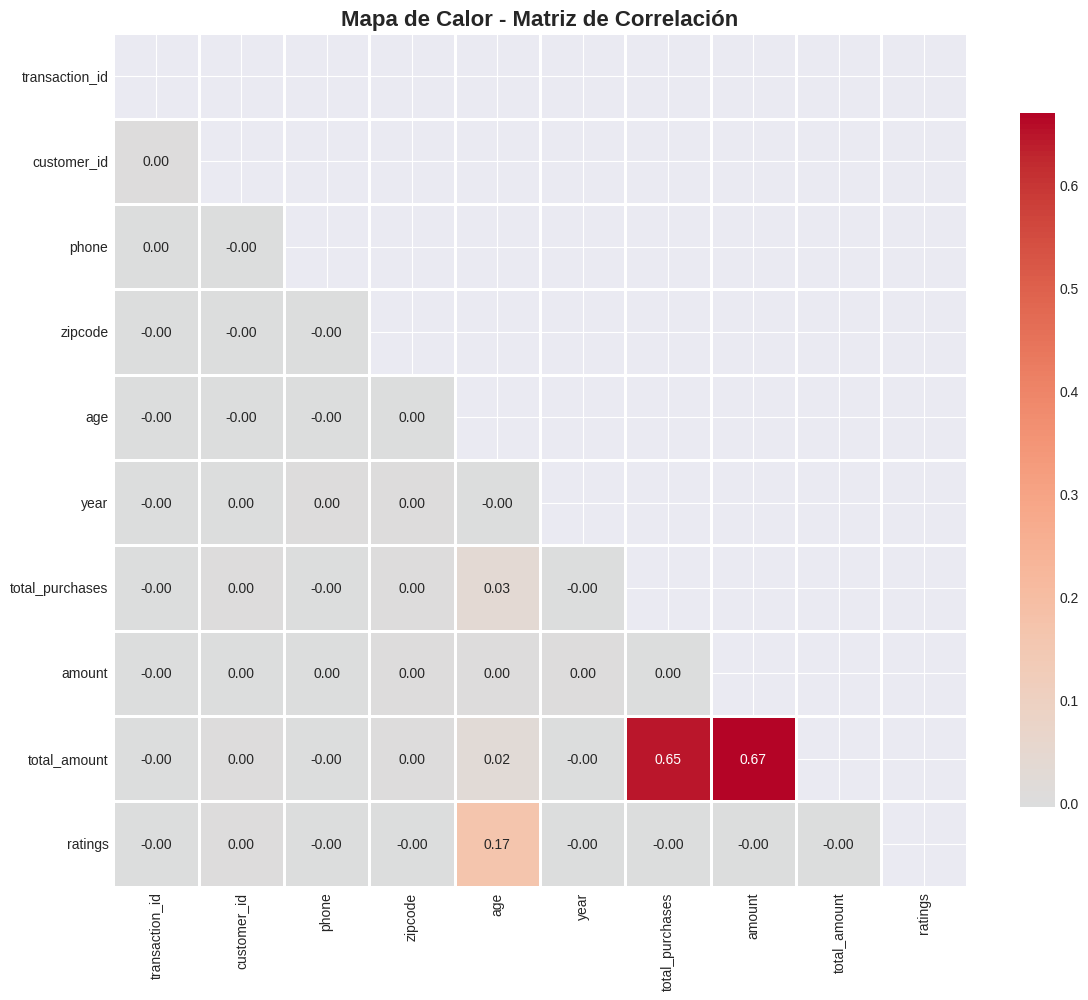


Correlaciones más fuertes (|r| > 0.5):
total_purchases vs total_amount: 0.648
amount vs total_amount: 0.670


In [13]:
# 7. ANÁLISIS DE CORRELACIÓN Y MAPA DE CALOR
print("\nANÁLISIS DE CORRELACIÓN")
print("="*80)

# Seleccionar solo columnas numéricas
numeric_data = df.select_dtypes(include=[np.number])
correlation_matrix = numeric_data.corr()

# Crear mapa de calor
plt.figure(figsize=(12, 10))
mask = np.triu(np.ones_like(correlation_matrix, dtype=bool))  # Máscara para triángulo superior
sns.heatmap(correlation_matrix,
            mask=mask,
            annot=True,
            cmap='coolwarm',
            center=0,
            fmt='.2f',
            square=True,
            linewidths=1,
            cbar_kws={"shrink": .8})
plt.title('Mapa de Calor - Matriz de Correlación', fontsize=16, fontweight='bold')
plt.tight_layout()
plt.show()

# Mostrar correlaciones más fuertes
print("\nCorrelaciones más fuertes (|r| > 0.5):")
for i in range(len(correlation_matrix.columns)):
    for j in range(i+1, len(correlation_matrix.columns)):
        corr_value = correlation_matrix.iloc[i, j]
        if abs(corr_value) > 0.5:
            col1 = correlation_matrix.columns[i]
            col2 = correlation_matrix.columns[j]
            print(f"{col1} vs {col2}: {corr_value:.3f}")

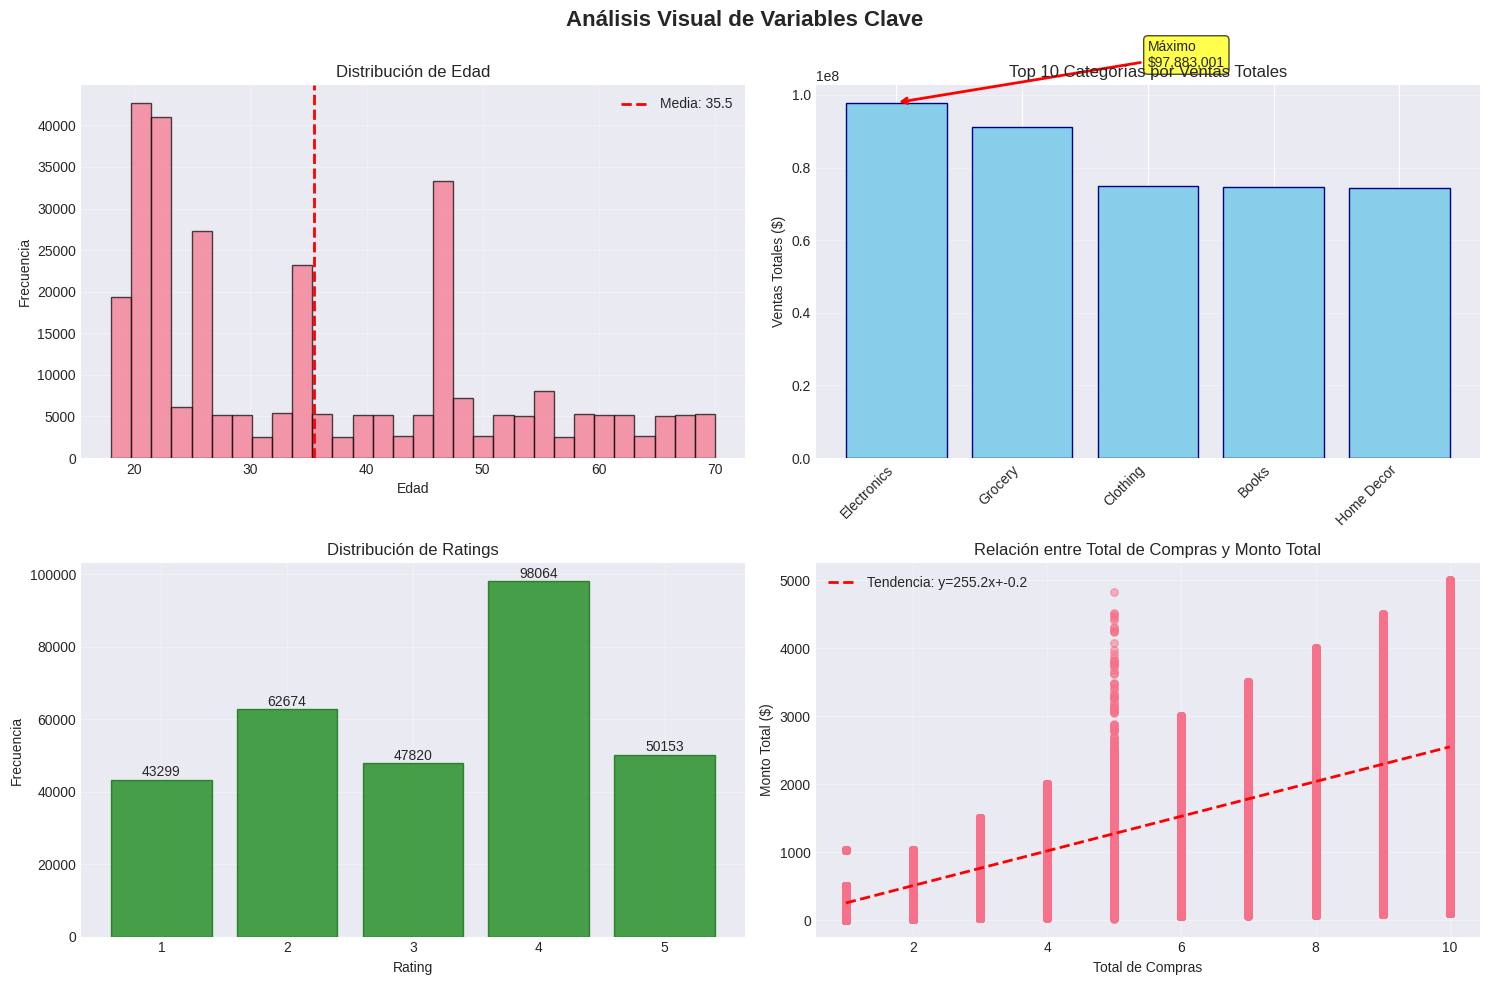

In [14]:
# 8. VISUALIZACIÓN DE DATOS CON SUBPLOTS
fig, axes = plt.subplots(2, 2, figsize=(15, 10))
fig.suptitle('Análisis Visual de Variables Clave', fontsize=16, fontweight='bold')

# Subplot 1: Distribución de edad
if 'age' in df.columns:
    axes[0, 0].hist(df['age'].dropna(), bins=30, edgecolor='black', alpha=0.7)
    axes[0, 0].set_title('Distribución de Edad')
    axes[0, 0].set_xlabel('Edad')
    axes[0, 0].set_ylabel('Frecuencia')
    axes[0, 0].grid(True, alpha=0.3)
    axes[0, 0].axvline(df['age'].mean(), color='red', linestyle='--', linewidth=2, label=f'Media: {df["age"].mean():.1f}')
    axes[0, 0].legend()

# Subplot 2: Top 10 categorías por ventas
if 'product_category' in df.columns and 'total_amount' in df.columns:
    category_sales = df.groupby('product_category')['total_amount'].sum().sort_values(ascending=False).head(10)
    bars = axes[0, 1].bar(range(len(category_sales)), category_sales.values, color='skyblue', edgecolor='navy')
    axes[0, 1].set_xticks(range(len(category_sales)))
    axes[0, 1].set_xticklabels(category_sales.index, rotation=45, ha='right')
    axes[0, 1].set_title('Top 10 Categorías por Ventas Totales')
    axes[0, 1].set_ylabel('Ventas Totales ($)')
    axes[0, 1].grid(True, axis='y', alpha=0.3)

    # Anotar el valor máximo con flecha
    max_idx = 0
    max_val = category_sales.values[0]
    axes[0, 1].annotate(f'Máximo\n${max_val:,.0f}',
                        xy=(max_idx, max_val),
                        xytext=(max_idx+2, max_val*1.1),
                        arrowprops=dict(arrowstyle='->', color='red', lw=2),
                        fontsize=10,
                        bbox=dict(boxstyle='round,pad=0.3', facecolor='yellow', alpha=0.7))

# Subplot 3: Distribución de ratings
if 'ratings' in df.columns:
    rating_counts = df['ratings'].value_counts().sort_index()
    axes[1, 0].bar(rating_counts.index, rating_counts.values, color='green', edgecolor='darkgreen', alpha=0.7)
    axes[1, 0].set_title('Distribución de Ratings')
    axes[1, 0].set_xlabel('Rating')
    axes[1, 0].set_ylabel('Frecuencia')
    axes[1, 0].grid(True, alpha=0.3)
    axes[1, 0].set_xticks(rating_counts.index)

    # Añadir valores en las barras
    for i, (rating, count) in enumerate(rating_counts.items()):
        axes[1, 0].text(rating, count + 100, str(count), ha='center', va='bottom')

# Subplot 4: Scatter plot - Relación entre compras y monto
if 'total_purchases' in df.columns and 'total_amount' in df.columns:
    scatter = axes[1, 1].scatter(df['total_purchases'], df['total_amount'], alpha=0.5, s=30)
    axes[1, 1].set_title('Relación entre Total de Compras y Monto Total')
    axes[1, 1].set_xlabel('Total de Compras')
    axes[1, 1].set_ylabel('Monto Total ($)')
    axes[1, 1].grid(True, alpha=0.3)

    # Añadir línea de tendencia
    z = np.polyfit(df['total_purchases'], df['total_amount'], 1)
    p = np.poly1d(z)
    axes[1, 1].plot(df['total_purchases'].sort_values(),
                    p(df['total_purchases'].sort_values()),
                    "r--", linewidth=2, label=f'Tendencia: y={z[0]:.1f}x+{z[1]:.1f}')
    axes[1, 1].legend()

plt.tight_layout()
plt.show()

In [15]:
# Guardar datos limpios "Si se necesita lo utilizo" por mientras lo voy a comentar
#df.to_csv('retail_data_clean.csv', index=False)
#print("\nDatos limpios guardados en 'retail_data_clean.csv'")
#print(f"Dimensiones finales: {df.shape}")


Datos limpios guardados en 'retail_data_clean.csv'
Dimensiones finales: (302010, 30)


## Parte 2: Preprocesamiento de Datos

In [24]:
# Preparar datos para modelado
# Crear variable objetivo: predecir si el rating es alto (>= 4)
df['high_rating'] = (df['ratings'] >= 4).astype(int)

print("Distribución de la variable objetivo:")
print(df['high_rating'].value_counts())
print(f"\nPorcentaje de ratings altos: {df['high_rating'].mean()*100:.2f}%")

Distribución de la variable objetivo:
high_rating
0    153790
1    148216
Name: count, dtype: int64

Porcentaje de ratings altos: 49.08%


In [28]:
# Seleccionar features relevantes
# Ajustar según las columnas disponibles en tu dataset
features = ['age', 'total_purchases', 'amount', 'total_amount',
            'gender', 'income', 'customer_segment', 'product_category']

# Verificar qué features están disponibles
available_features = [f for f in features if f in df.columns]
print(f"Features disponibles: {available_features}")

X = df[available_features]
y = df['high_rating']

# Separar columnas numéricas y nominales
num_cols = X.select_dtypes(include=['int64', 'float64']).columns.tolist()
nom_cols = X.select_dtypes(include=['object']).columns.tolist()

print(f"\nFeatures numéricas: {num_cols}")
print(f"Features nominales: {nom_cols}")

Features disponibles: ['age', 'total_purchases', 'amount', 'total_amount', 'gender', 'income', 'customer_segment', 'product_category']

Features numéricas: ['age', 'total_purchases', 'amount', 'total_amount']
Features nominales: ['gender', 'income', 'customer_segment', 'product_category']


In [29]:
# Crear ColumnTransformer para preprocesamiento
preprocessor = ColumnTransformer(
    transformers=[
        ('num', StandardScaler(), num_cols_),
        ('cat', OneHotEncoder(drop='first', sparse_output=False, handle_unknown='ignore'), nom_cols)
    ])

# Crear pipeline de preprocesamiento
preprocessing_pipeline = Pipeline([
    ('preprocessor', preprocessor)
])

# Dividir datos en entrenamiento y prueba
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42, stratify=y)

print(f"Tamaño del conjunto de entrenamiento: {X_train.shape}")
print(f"Tamaño del conjunto de prueba: {X_test.shape}")

# Aplicar transformaciones
X_train_processed = preprocessing_pipeline.fit_transform(X_train)
X_test_processed = preprocessing_pipeline.transform(X_test)

print(f"\nForma de datos procesados:")
print(f"X_train procesado: {X_train_processed.shape}")
print(f"X_test procesado: {X_test_processed.shape}")

Tamaño del conjunto de entrenamiento: (241604, 8)
Tamaño del conjunto de prueba: (60402, 8)

Forma de datos procesados:
X_train procesado: (241604, 13)
X_test procesado: (60402, 13)


## Parte 3: Benchmarking de Técnicas de Machine Learning

In [30]:
# Definir diccionario de modelos
models = {
    'Logistic Regression': LogisticRegression(random_state=42, max_iter=1000),
    'KNN': KNeighborsClassifier(n_neighbors=5),
    'Decision Tree': DecisionTreeClassifier(random_state=42, max_depth=10),
    'Random Forest': RandomForestClassifier(random_state=42, n_estimators=100, n_jobs=-1),
    'XGBoost': XGBClassifier(random_state=42, eval_metric='logloss', n_jobs=-1),
    'LightGBM': LGBMClassifier(random_state=42, verbose=-1, n_jobs=-1)
}

# Diccionario para almacenar resultados
results = {}

print("ENTRENAMIENTO Y EVALUACIÓN DE MODELOS")
print("="*80)

# Entrenar y evaluar cada modelo
for name, model in models.items():
    print(f"\nEntrenando {name}...")

    # Validación cruzada
    cv_scores = cross_val_score(model, X_train_processed, y_train, cv=5, scoring='accuracy')

    # Entrenar modelo
    model.fit(X_train_processed, y_train)

    # Predicciones
    y_pred = model.predict(X_test_processed)
    y_pred_proba = model.predict_proba(X_test_processed)[:, 1]

    # Calcular métricas
    results[name] = {
        'CV_Score_Mean': cv_scores.mean(),
        'CV_Score_Std': cv_scores.std(),
        'Accuracy': accuracy_score(y_test, y_pred),
        'Precision': precision_score(y_test, y_pred, zero_division=0),
        'Recall': recall_score(y_test, y_pred, zero_division=0),
        'F1_Score': f1_score(y_test, y_pred, zero_division=0),
        'ROC_AUC': roc_auc_score(y_test, y_pred_proba),
        'Model': model,
        'Predictions': y_pred,
        'Probabilities': y_pred_proba
    }

    print(f"  CV Score: {results[name]['CV_Score_Mean']:.4f} (+/- {results[name]['CV_Score_Std']:.4f})")
    print(f"  Test Accuracy: {results[name]['Accuracy']:.4f}")
    print(f"  Test F1-Score: {results[name]['F1_Score']:.4f}")

ENTRENAMIENTO Y EVALUACIÓN DE MODELOS

Entrenando Logistic Regression...
  CV Score: 0.5798 (+/- 0.0027)
  Test Accuracy: 0.5818
  Test F1-Score: 0.5465

Entrenando KNN...
  CV Score: 0.5460 (+/- 0.0008)
  Test Accuracy: 0.5456
  Test F1-Score: 0.5347

Entrenando Decision Tree...
  CV Score: 0.5891 (+/- 0.0029)
  Test Accuracy: 0.5907
  Test F1-Score: 0.5284

Entrenando Random Forest...
  CV Score: 0.5482 (+/- 0.0014)
  Test Accuracy: 0.5445
  Test F1-Score: 0.5328

Entrenando XGBoost...
  CV Score: 0.5883 (+/- 0.0031)
  Test Accuracy: 0.5907
  Test F1-Score: 0.5273

Entrenando LightGBM...
  CV Score: 0.5926 (+/- 0.0022)
  Test Accuracy: 0.5930
  Test F1-Score: 0.5321


In [31]:
# DataFrame comparativo de resultados
results_df = pd.DataFrame({
    name: {
        'CV_Score': f"{res['CV_Score_Mean']:.4f} ± {res['CV_Score_Std']:.4f}",
        'Accuracy': res['Accuracy'],
        'Precision': res['Precision'],
        'Recall': res['Recall'],
        'F1_Score': res['F1_Score'],
        'ROC_AUC': res['ROC_AUC']
    } for name, res in results.items()
}).T

print("\nCOMPARACIÓN DE MODELOS")
display(results_df)

# Identificar mejor modelo
best_model_f1 = results_df['F1_Score'].astype(float).idxmax()
best_model_auc = results_df['ROC_AUC'].astype(float).idxmax()

print(f"\nMejor modelo por F1-Score: {best_model_f1} ({results_df.loc[best_model_f1, 'F1_Score']:.4f})")
print(f"Mejor modelo por ROC-AUC: {best_model_auc} ({results_df.loc[best_model_auc, 'ROC_AUC']:.4f})")


COMPARACIÓN DE MODELOS


,CV_Score,Accuracy,Precision,Recall,F1_Score,ROC_AUC
Logistic Regression,0.5798 ± 0.0027,0.581802,0.584139,0.513359,0.546467,0.598265
KNN,0.5460 ± 0.0008,0.545578,0.537418,0.531979,0.534685,0.560043
Decision Tree,0.5891 ± 0.0029,0.590659,0.607944,0.467278,0.52841,0.627736
Random Forest,0.5482 ± 0.0014,0.544535,0.536473,0.52918,0.532801,0.573001
XGBoost,0.5883 ± 0.0031,0.590742,0.608678,0.465153,0.527324,0.626848
LightGBM,0.5926 ± 0.0022,0.592977,0.610483,0.471495,0.532062,0.634077



Mejor modelo por F1-Score: Logistic Regression (0.5465)
Mejor modelo por ROC-AUC: LightGBM (0.6341)


## Parte 4: Análisis de Métricas

In [33]:
# Seleccionar el mejor modelo para análisis detallado
best_model_name = best_model_f1
best_model = results[best_model_name]['Model']
y_pred_best = results[best_model_name]['Predictions']
y_proba_best = results[best_model_name]['Probabilities']

print(f"ANÁLISIS DETALLADO DEL MEJOR MODELO: {best_model_name}")

ANÁLISIS DETALLADO DEL MEJOR MODELO: Logistic Regression


In [35]:
# 1. INFORME DE CLASIFICACIÓN
print("\nINFORME DE CLASIFICACIÓN:")
print("="*55)
print(classification_report(y_test, y_pred_best, target_names=['Rating Bajo', 'Rating Alto']))


INFORME DE CLASIFICACIÓN:
              precision    recall  f1-score   support

 Rating Bajo       0.58      0.65      0.61     30758
 Rating Alto       0.58      0.51      0.55     29644

    accuracy                           0.58     60402
   macro avg       0.58      0.58      0.58     60402
weighted avg       0.58      0.58      0.58     60402



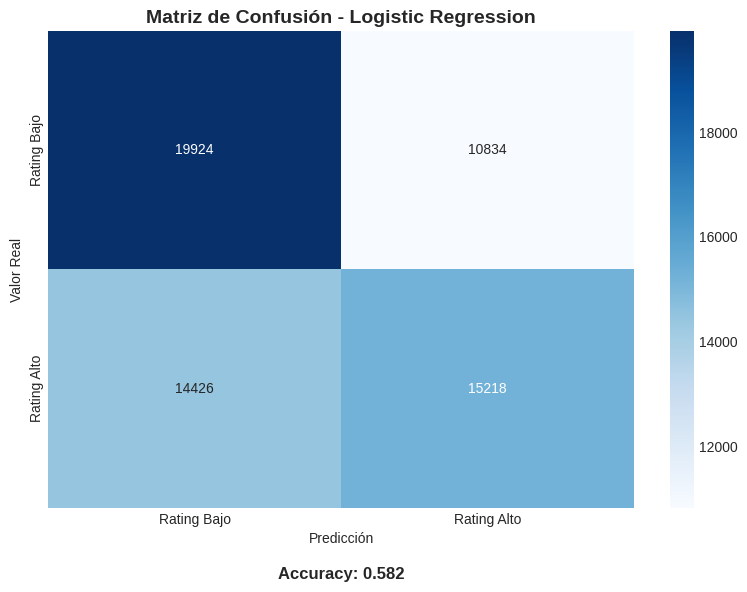


Análisis de la Matriz de Confusión:
Verdaderos Negativos (TN): 19,924
Falsos Positivos (FP): 10,834
Falsos Negativos (FN): 14,426
Verdaderos Positivos (TP): 15,218


In [36]:
# 2. MATRIZ DE CONFUSIÓN
cm = confusion_matrix(y_test, y_pred_best)

plt.figure(figsize=(8, 6))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues',
            xticklabels=['Rating Bajo', 'Rating Alto'],
            yticklabels=['Rating Bajo', 'Rating Alto'])
plt.title(f'Matriz de Confusión - {best_model_name}', fontsize=14, fontweight='bold')
plt.ylabel('Valor Real')
plt.xlabel('Predicción')

# Añadir métricas en la matriz
total = cm.sum()
accuracy = np.diag(cm).sum() / total
plt.text(0.5, -0.15, f'Accuracy: {accuracy:.3f}', transform=plt.gca().transAxes,
         ha='center', fontsize=12, fontweight='bold')

plt.tight_layout()
plt.show()

# Análisis de la matriz
tn, fp, fn, tp = cm.ravel()
print(f"\nAnálisis de la Matriz de Confusión:")
print(f"Verdaderos Negativos (TN): {tn:,}")
print(f"Falsos Positivos (FP): {fp:,}")
print(f"Falsos Negativos (FN): {fn:,}")
print(f"Verdaderos Positivos (TP): {tp:,}")

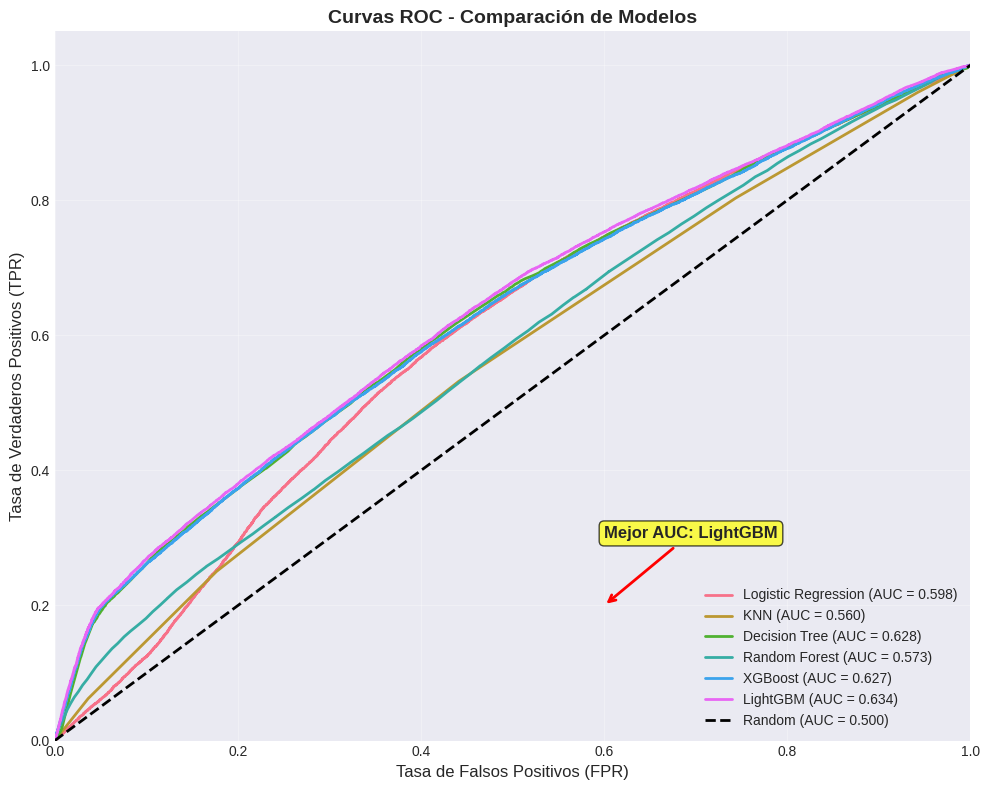

In [37]:
# 3. CURVAS ROC Y AUC PARA TODOS LOS MODELOS
plt.figure(figsize=(10, 8))

# Plotear curva ROC para cada modelo
for name, res in results.items():
    fpr, tpr, _ = roc_curve(y_test, res['Probabilities'])
    roc_auc = auc(fpr, tpr)
    plt.plot(fpr, tpr, linewidth=2, label=f'{name} (AUC = {roc_auc:.3f})')

# Línea diagonal (clasificador aleatorio)
plt.plot([0, 1], [0, 1], 'k--', linewidth=2, label='Random (AUC = 0.500)')

# Configuración del gráfico
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('Tasa de Falsos Positivos (FPR)', fontsize=12)
plt.ylabel('Tasa de Verdaderos Positivos (TPR)', fontsize=12)
plt.title('Curvas ROC - Comparación de Modelos', fontsize=14, fontweight='bold')
plt.legend(loc="lower right")
plt.grid(True, alpha=0.3)

# Añadir anotación sobre el mejor modelo
plt.annotate(f'Mejor AUC: {best_model_auc}',
             xy=(0.6, 0.2), xytext=(0.6, 0.3),
             arrowprops=dict(arrowstyle='->', color='red', lw=2),
             fontsize=12, fontweight='bold',
             bbox=dict(boxstyle='round,pad=0.3', facecolor='yellow', alpha=0.7))

plt.tight_layout()
plt.show()

In [38]:
# 4. RESUMEN FINAL DE MÉTRICAS
print("\nRESUMEN FINAL DE MÉTRICAS")
print("="*80)
print(f"Mejor Modelo: {best_model_name}")
print("\nMétricas de Rendimiento:")
print(f"  • Accuracy: {results[best_model_name]['Accuracy']:.4f}")
print(f"  • Precision: {results[best_model_name]['Precision']:.4f}")
print(f"  • Recall: {results[best_model_name]['Recall']:.4f}")
print(f"  • F1-Score: {results[best_model_name]['F1_Score']:.4f}")
print(f"  • ROC-AUC: {results[best_model_name]['ROC_AUC']:.4f}")
print(f"\nValidación Cruzada:")
print(f"  • Score Medio: {results[best_model_name]['CV_Score_Mean']:.4f}")
print(f"  • Desviación Estándar: {results[best_model_name]['CV_Score_Std']:.4f}")


RESUMEN FINAL DE MÉTRICAS
Mejor Modelo: Logistic Regression

Métricas de Rendimiento:
  • Accuracy: 0.5818
  • Precision: 0.5841
  • Recall: 0.5134
  • F1-Score: 0.5465
  • ROC-AUC: 0.5983

Validación Cruzada:
  • Score Medio: 0.5798
  • Desviación Estándar: 0.0027


In [40]:
# Guardar el mejor modelo, para futuros trabajos
import joblib

# Crear pipeline completo con preprocesamiento y modelo
full_pipeline = Pipeline([
    ('preprocessor', preprocessor),
    ('classifier', best_model)
])

# Reentrenar con todos los datos
full_pipeline.fit(X_train, y_train)

# Guardar pipeline
joblib.dump(full_pipeline, 'best_model_pipeline.pkl')
print("\nModelo guardado como 'best_model_pipeline.pkl'")

# Guardar resultados
results_df.to_csv('model_comparison_results.csv')
print("Resultados guardados en 'model_comparison_results.csv'")


Modelo guardado como 'best_model_pipeline.pkl'
Resultados guardados en 'model_comparison_results.csv'
